# **Submission 02 - Gold Price - Time Series**
### **Nur Imam Masri**
### **nurimammasri.01@gmail.com**

# **Import Library**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
plt.style.use('seaborn')

# **Data Loading**

**Learn Time Series Forecasting From Gold Price**

[Learn Time Series Forecasting From Gold Price](https://www.kaggle.com/arashnic/learn-time-series-forecasting-from-gold-price)

**Context**

Gold, the yellow shiny metal, has been the fancy of mankind since ages. From making jewelry to being used
as an investment, gold covers a huge spectrum of use cases. Gold, like other metals, is also traded on the
commodities indexes across the world. For better understanding time series in a real-world scenario, we will
work with gold prices collected historically and predict its future value.

**Content**

Metals such as gold have been traded for years across the world. Prices of gold are determined and used
for trading the metal on commodity exchanges on a daily basis using a variety of factors. Using this daily
price-level information only, our task is to predict future price of gold.

**Data**

The following snippet shows a quick one-liner to get your hands on gold pricing
information since 1970s.


**Inspiration**

Forecast gold price

Data yang digunakan berasal dari Dataset dari kaggle yang memiliki dataset:

* gold_price_data.csv

**use kaggle API**

**Download dataset from Kaggle**

In [3]:
# # install kaggle package
# !pip install -q kaggle

In [4]:
# # upload kaggle.json
# from google.colab import files
# files.upload()

In [5]:
# # make directory and change permission
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !ls ~/.kaggle

In [6]:
# # test kaggle dataset list
# !kaggle datasets list

In [7]:
# # download dataset, choose 'copy api command' from kaggle dataset
# !kaggle datasets download -d arashnic/learn-time-series-forecasting-from-gold-price

In [8]:
# # unzip
# !mkdir learntimeseries
# !unzip learn-time-series-forecasting-from-gold-price.zip -d learntimeseries
# !ls learntimeseries

In [9]:
# import pandas as pd
# df_gold = pd.read_csv('learntimeseries/gold_price_data.csv')
# df_gold.head()

**use by link gdrive**

In [10]:
import pandas as pd
df_gold = pd.read_csv('https://drive.google.com/uc?id=1fAtxlCoFIoRxFgygCqNWe3ElqvWWkeXE')
df_gold.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


**change column name**

In [11]:
df_gold.columns = ['date', 'value']

In [12]:
df_gold.min()

date     1970-01-01
value          35.1
dtype: object

In [13]:
df_gold.max()

date     2020-03-13
value          1895
dtype: object

Menampilkan daftar columns

In [14]:
df_gold.columns

Index(['date', 'value'], dtype='object')

Ada 10787 baris data yang berarti ada 10787 per date

2 kolom yang berarti 2 columns (Features)

In [15]:
# the shape of data
print('Total Row:', df_gold.shape[0])
print('Total Columns:', df_gold.shape[1])
df_gold.shape

Total Row: 10787
Total Columns: 2


(10787, 2)

Melihat keseluruhan profile data, dapat dilihat tidak ada data null dari 10787 data, serta sebagian data memiliki nilai berupa numerik selain Date

In [16]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    10787 non-null  object 
 1   value   10787 non-null  float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB


In [17]:
df_gold.describe()

,value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


# **Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


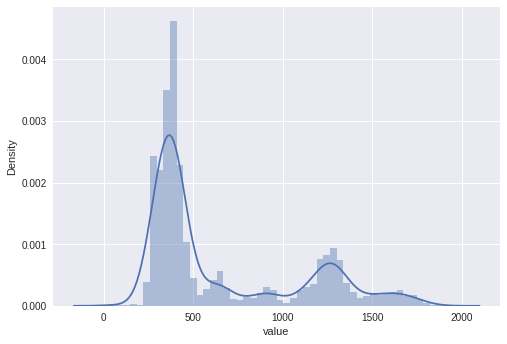

In [18]:
sns.distplot(df_gold['value'], bins=50)
plt.show()

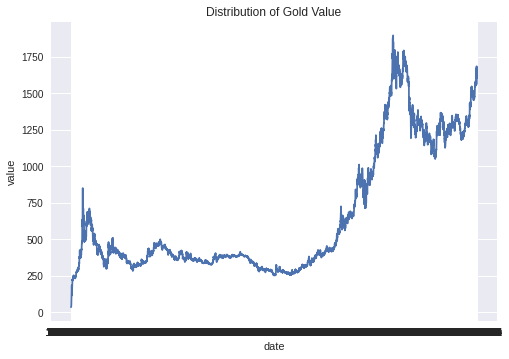

In [19]:
sns.lineplot(data=df_gold, x="date", y="value")
plt.title("Distribution of Gold Value")
plt.show()

In [20]:
gold=df_gold[['date','value']].copy()
gold['date'] = pd.to_datetime(gold['date'])

gold.set_index('date', inplace= True)
gold.head()

,value
date,
1970-01-01,35.2
1970-04-01,35.1
1970-07-01,35.4
1970-10-01,36.2
1971-01-01,37.4


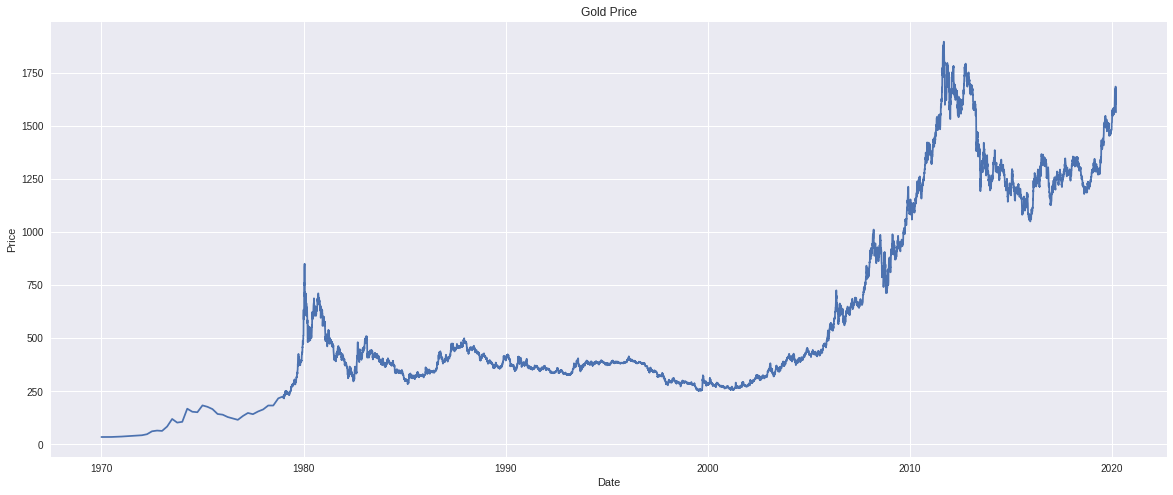

In [21]:
plt.figure(figsize=(20,8))
plt.plot(gold)
plt.title('Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Tidak ada outliers

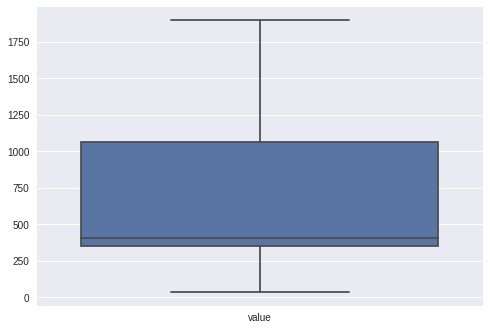

In [22]:
sns.boxplot(data=df_gold)
plt.show()

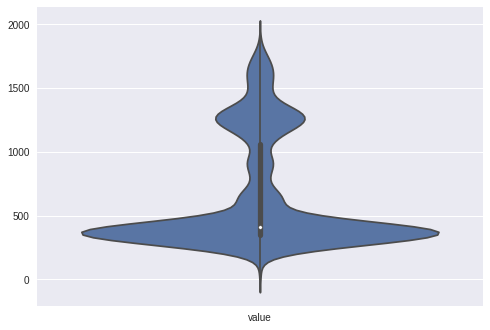

In [23]:
sns.violinplot(data=df_gold)
plt.show()

# **Data Preprocessing**

In [24]:
df_gold.head(3)

,date,value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4


**Handling Missing Value**

Untuk mengefektifkan model dalam mempelajari data dilakukan cleaning data dari missing value. Namun dari pengecekan data tidak memiliki missing value.

In [25]:
df_gold.isnull().any()

date     False
value    False
dtype: bool

In [26]:
df_gold.isna().any()

date     False
value    False
dtype: bool

**Outlier Analysis**

Dapat dilihat pada box plot data tidak memiliki outliers

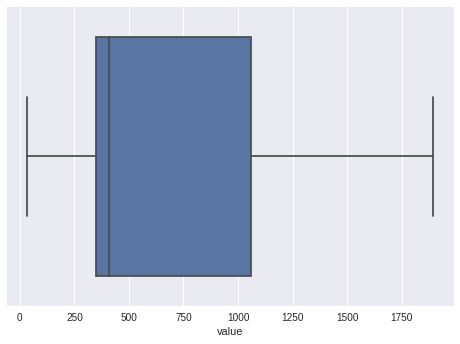

In [27]:
sns.boxplot(x=df_gold['value'])

**Scaling / Normalization**

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mx = MinMaxScaler()

In [30]:
df_gold['value'] = mx.fit_transform(df_gold[['value']])
df_gold

,date,value
0,1970-01-01,0.000054
1,1970-04-01,0.000000
2,1970-07-01,0.000161
3,1970-10-01,0.000591
4,1971-01-01,0.001237
...,...,...
10782,2020-03-09,0.880370
10783,2020-03-10,0.871337
10784,2020-03-11,0.870289
10785,2020-03-12,0.825636


**Split Data**

Selanjutnya dilakukan ektraksi data.

Maka kita tinggal mengektraksi label dan featuresnya

Prepare Feature and Label

* `feature` data set biasa disebut independent data set (X), yakni columns

* `target` data set also known as the dependent data set (Y)

Kemudian selanjutnya akan di split antara data training dan data testing

In [31]:
dates = df_gold['date'].values
prices = df_gold['value'].values

In [32]:
dates

array(['1970-01-01', '1970-04-01', '1970-07-01', ..., '2020-03-11',
       '2020-03-12', '2020-03-13'], dtype=object)

In [33]:
prices

array([5.37663315e-05, 0.00000000e+00, 1.61298995e-04, ...,
       8.70288725e-01, 8.25635787e-01, 8.21388247e-01])

Lalu, bagi data untuk training dan data untuk testing, dengan presentasi 80% Training set dan 20% Validation set.

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dates, prices, test_size = 0.2, random_state = 0 , shuffle=False)

In [35]:
print(len(x_train), len(x_test))

8629 2158


In [36]:
x_train.shape

(8629,)

In [37]:
x_train

array(['1970-01-01', '1970-04-01', '1970-07-01', ..., '2011-12-02',
       '2011-12-05', '2011-12-06'], dtype=object)

**Windowed**

In [38]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [39]:
data_x_train = windowed_dataset(y_train, window_size=60, batch_size=100, shuffle_buffer=5000)
data_x_test = windowed_dataset(y_test, window_size=60, batch_size=100, shuffle_buffer=5000)

# **Data Modelling**

In [40]:
from keras.layers import Dense, LSTM
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(256, return_sequences=True),
  tf.keras.layers.LSTM(256),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

Selanjutnya kita buat kelas callback. fungsi yang paling penting yaitu `on_epoch_end()`. Fungsi inilah yang akan kita gunakan untuk memberitahu model agar berhenti melakukan pelatihan ketika telah mencapai target.

Kode `self.model.stop_training = True` adalah kode yang memberi tahu model untuk menghentikan pelatihan.

In [41]:
max = df_gold['value'].max()
print('Max value : ' )
print(max)

Max value : 
1.0


In [42]:
min = df_gold['value'].min()
print('Min Value : ')
print(min)

Min Value : 
0.0


In [43]:
x = (max - min) * 0.1
print(x)

0.1


In [44]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < x and logs.get('val_mae') < x):
      self.model.stop_training = True
      print("\nMAE of the model < 10% of data scale")
callbacks = myCallback()

Terakhir kita dapat mulai melatih model kita dengan memanggil fungsi fit().

In [45]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
history = model.fit(
    data_x_train,
    epochs=100,  
    validation_data=(data_x_test), 
    verbose=2, 
    callbacks=[callbacks]
)

Epoch 1/100
86/86 - 95s - loss: 0.0373 - mae: 0.2277 - val_loss: 0.2238 - val_mae: 0.6631
Epoch 2/100
86/86 - 89s - loss: 0.0270 - mae: 0.1786 - val_loss: 0.1840 - val_mae: 0.6000
Epoch 3/100
86/86 - 89s - loss: 0.0189 - mae: 0.1289 - val_loss: 0.1549 - val_mae: 0.5497
Epoch 4/100
86/86 - 89s - loss: 0.0147 - mae: 0.0969 - val_loss: 0.1358 - val_mae: 0.5139
Epoch 5/100
86/86 - 89s - loss: 0.0124 - mae: 0.0810 - val_loss: 0.1217 - val_mae: 0.4859
Epoch 6/100
86/86 - 89s - loss: 0.0112 - mae: 0.0763 - val_loss: 0.1117 - val_mae: 0.4649
Epoch 7/100
86/86 - 88s - loss: 0.0104 - mae: 0.0779 - val_loss: 0.1045 - val_mae: 0.4494
Epoch 8/100
86/86 - 89s - loss: 0.0100 - mae: 0.0806 - val_loss: 0.0991 - val_mae: 0.4372
Epoch 9/100
86/86 - 89s - loss: 0.0097 - mae: 0.0831 - val_loss: 0.0950 - val_mae: 0.4279
Epoch 10/100
86/86 - 88s - loss: 0.0095 - mae: 0.0851 - val_loss: 0.0919 - val_mae: 0.4208
Epoch 11/100
86/86 - 88s - loss: 0.0094 - mae: 0.0866 - val_loss: 0.0894 - val_mae: 0.4149
Epoch 12

**Plot Loss dan MAE**

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()